Projeto de Transfer Learning em Python

O projeto consiste em aplicar o método de Transfer Learning em uma rede de Deep Learning na linguagem Python no ambiente COLAB. 

Para exemplo, utilizaremos o seguinte projeto que realiza Transfer Learning com o Dataset do MNIST:  

https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb

O dataset utilizado engloba duas classes: gatos e cachorros. Uma descrição da base de dados pode ser visualizada neste link: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs.  Já o dataset para download pode ser acessado por meio deste outro link: https://www.microsoft.com/en-us/download/details.aspx?id=54765.

Observações: Neste projeto, você pode usar sua própria base de dados (exemplo: fotos suas, dos seus pais, dos seus amigos, dos seus animais domésticos, etc), o exemplo de gatos e cachorros, pode ser substituído por duas outras classes do seu interesse. 

O projeto deve ser enviado para o GitHub da DIO: https://github.com/digitalinnovationone. 



In [1]:
#IMPORTS DE BBLIOTECA

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
import wget

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import image_dataset_from_directory
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import tensorflow as tf


#38.1s
#1m 2.5s

In [ ]:
#setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

In [2]:
# FUNCAO QUE CARREGA A IMAGEM E A RETORNA PARA O VETOR DE ENTRADA
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x


def to_decimal(valor: pd.Series):
    return ["{:,.0f}".format(float(p)) for p in valor.astype("float") ]

def to_decimal2(valor: pd.Series):
    return ["{:,.2f}".format(float(p)) for p in valor.astype("float") ]

In [3]:
from tkinter import Image


data_dir = 'C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\'
exclude = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']
#train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(data_dir) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(data_dir, e) for e in exclude]]
#categories = [str(x).replace("\\", "/") for x in categories]

print(categories)



['C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\Cat', 'C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\Dog']


In [4]:
pathCats = 'C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\Cat'
pathDogs = 'C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\Dog'
len(os.listdir(pathCats)), len(os.listdir(pathDogs))

(12500, 12499)

In [5]:
## Carregar todo o dataset
#full_dataset = tf.keras.utils.image_dataset_from_directory(
#    data_dir,
#    image_size=(IMG_SIZE, IMG_SIZE),
#    batch_size=BATCH_SIZE,
#    shuffle=True
#)
    
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

def remove_corrompidos(directory_path):
    arquivos_corrompidos = []

    for root, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verifica se o arquivo é uma imagem válida
                    # Garantir que a imagem tem o número correto de canais
                    if img.mode not in ("RGB", "RGBA", "L"):
                        #print(f"Imagem inválida (modo {img.mode}): {file_path}")
                        arquivos_corrompidos.append(file_path)
                        os.remove(file_path)
            except Exception as e:
                #print(f"Removendo imagem corrompida: {file_path} - {e}")
                arquivos_corrompidos.append(file_path)
                try:
                    os.remove(file_path)
                except Exception as ex:
                    pass
                pass
    return f"Arquivos corrompidos em {dirs}: {len(arquivos_corrompidos)}"


def remove_img_corrompida(file_path):
    arquivos_corrompidos = []
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verifica se o arquivo é uma imagem válida
            # Garantir que a imagem tem o número correto de canais
            if img.mode not in ("RGB", "RGBA", "L", "P"):
                #print(f"Imagem inválida (modo {img.mode}): {file_path}")
                arquivos_corrompidos.append(file_path)
                os.remove(file_path)
    except Exception as e:
            #print(f"Removendo imagem corrompida: {file_path} - {e}")
            arquivos_corrompidos.append(file_path)
            os.remove(file_path)
            pass
    return f"Arquivos corrompidos: {len(arquivos_corrompidos)}"




In [ ]:
### Load all the images from root folder, excluding corrupted files.
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        try:
            img, x = get_image(img_path)
            data.append({'x':np.array(x[0]), 'y':c})
        except Exception as imgEx:
            remove_img_corrompida(img_path)
            pass


# count the number of classes
num_classes = len(categories)

#random.shuffle(data)
#56.1s
#data

In [10]:
train_split, val_split = 0.7, 0.15
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]


x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

#3m 34.5s

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 24997 images from 2 categories
train / validation / test split: 17497, 3750, 3750
training data shape:  (17497, 224, 224, 3)
training labels shape:  (17497, 2)


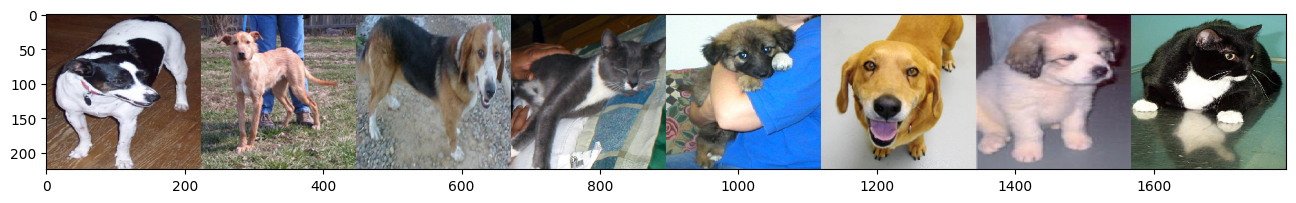

In [12]:

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(data_dir) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)


In [54]:
# Transfer Learning With Exists Network
#vgg = keras.applications.VGG16(weights='imagenet', include_top=True)

vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_26>

In [56]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()




In [ ]:
history = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=15,
                         validation_data=(x_val, y_val))

#262m 0.5s

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 1061s 8s/step - accuracy: 0.7875 - loss: 0.4760 - val_accuracy: 0.6803 - val_loss: 0.5612
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 1244s 9s/step - accuracy: 0.9102 - loss: 0.2310 - val_accuracy: 0.7787 - val_loss: 0.4195
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 1126s 8s/step - accuracy: 0.9241 - loss: 0.1984 - val_accuracy: 0.8197 - val_loss: 0.3483
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 1038s 8s/step - accuracy: 0.9247 - loss: 0.1839 - val_accuracy: 0.8499 - val_loss: 0.2982
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 1051s 8s/step - accuracy: 0.9304 - loss: 0.1748 - val_accuracy: 0.8667 - val_loss: 0.2727
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 1023s 7s/step - accuracy: 0.9328 - loss: 0.1725 - val_accuracy: 0.8899 - val_loss: 0.2339
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 1020s 7s/step - accuracy: 0.9330 - loss: 0.1707 - val_accuracy: 0.9424 - val_loss: 0.1370
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 1022s 7s/step - accuracy: 0.9382 - loss: 0.1617 - 

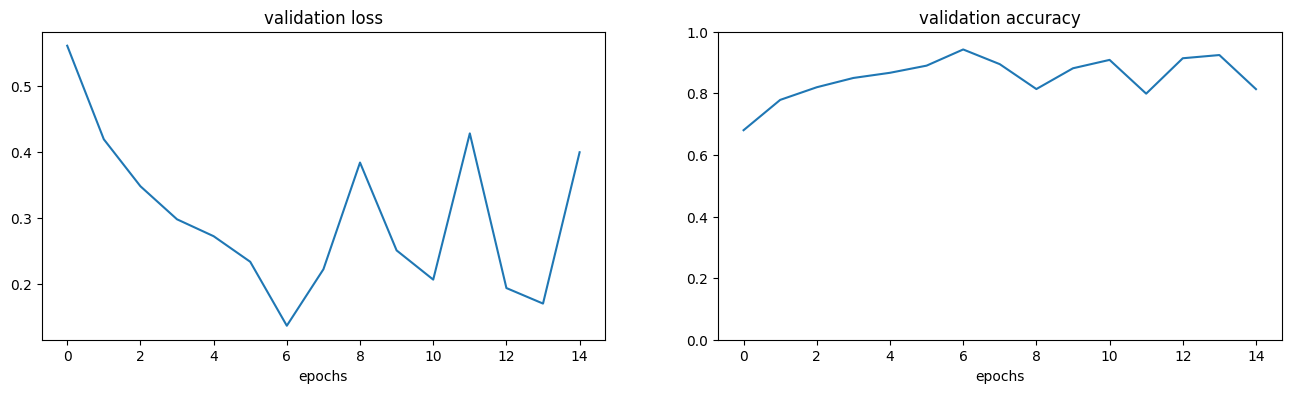

In [58]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
#ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
#ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
model_new.save("model_juscelino.keras")
#2.6s

In [60]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)



Test loss: 0.4190841615200043
Test accuracy: 0.8112000226974487


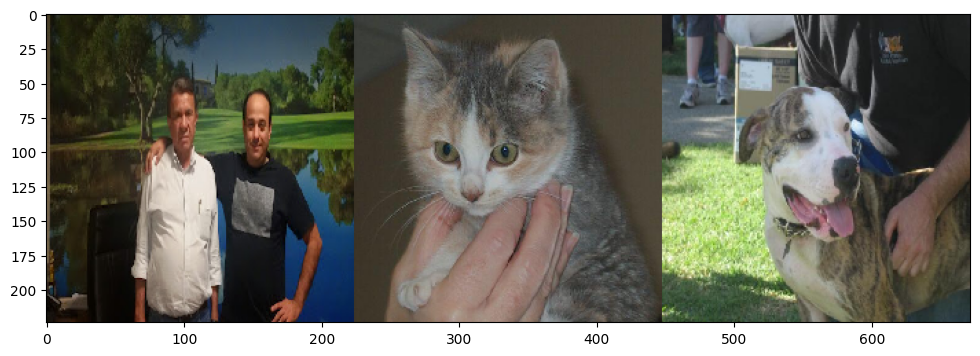

In [74]:
img3 = "C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\Dog\\49.jpg"
img2 = 'C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\Cat\\10002.jpg'
img1 = 'C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\EuPai.jpg'
images = []
images.append(img1)
images.append(img2)
images.append(img3)

imgs = [image.load_img(images[i], target_size=(224, 224)) for i in [0,1,2]]

concat_image2 = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image2)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


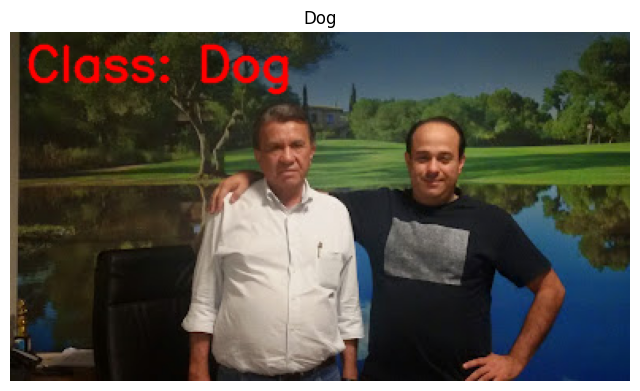

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


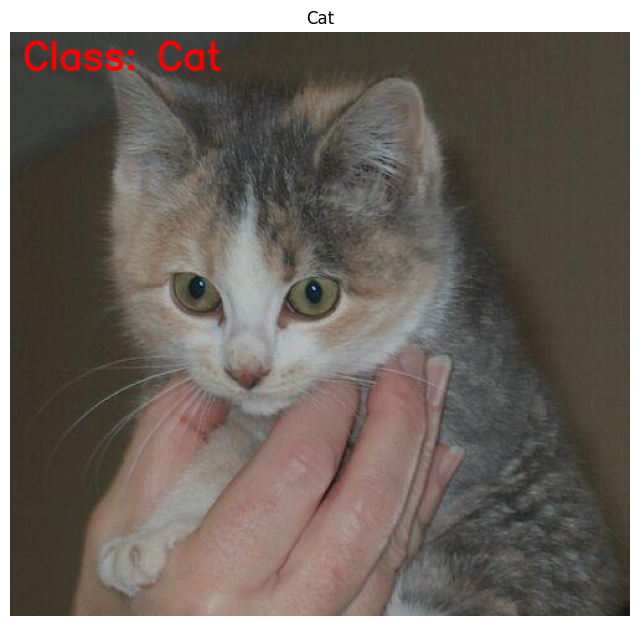

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


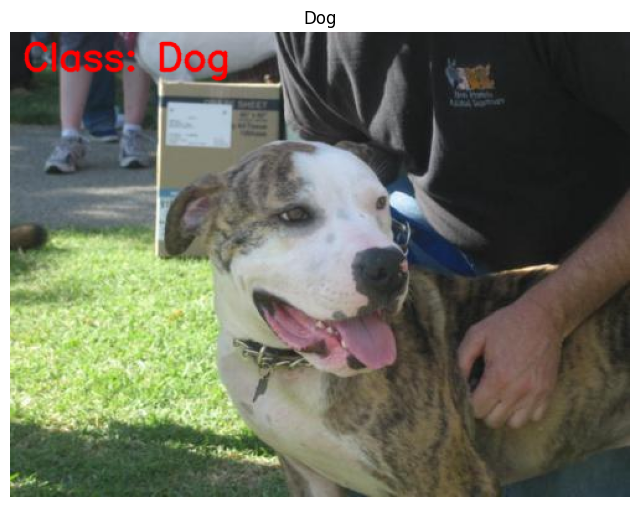

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import cv2

# Configuração do modelo treinado
#model_path = "path_to_your_model.h5"  # Substitua pelo caminho do modelo treinado
model = load_model("model_juscelino.keras")
#model = model_new #load_model(model_path)

# Função para pré-processar imagens
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalização
    return img_array

# Função para fazer predição e marcar imagens
def predict_and_annotate(image_path, model, class_names=('Cat', 'Dog')):
    # Carregar e pré-processar a imagem
    img_array = preprocess_image(image_path)
    
    # Fazer a predição
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_name = class_names[class_idx]
    
    # Carregar a imagem original para anotação
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Adicionar texto na imagem
    text = f"Class: {class_name}"
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, text, (10, 30), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
    
    # Exibir a imagem anotada
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_name)
    plt.show()


img3 = "C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\Dog\\49.jpg"
img2 = 'C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\Cat\\10002.jpg'
img = 'C:\\Users\\jkarv\\Documents\\DataMasterSantander\\CaseFULL\\DIO\\catsdogscompl\\PetImages\\EuPai.jpg'


# Testar com uma ou mais imagens
image_paths = [img, img2, img3]  # Substitua pelos caminhos das suas imagens
for image_path in image_paths:
    predict_and_annotate(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


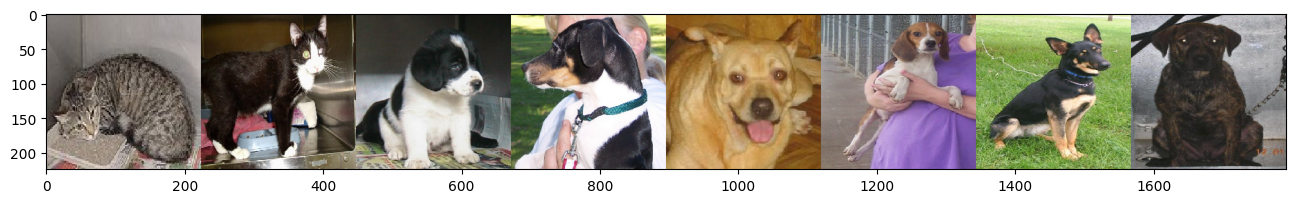

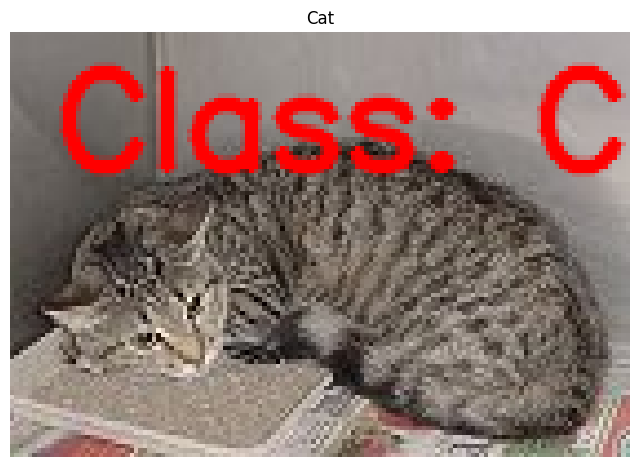

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


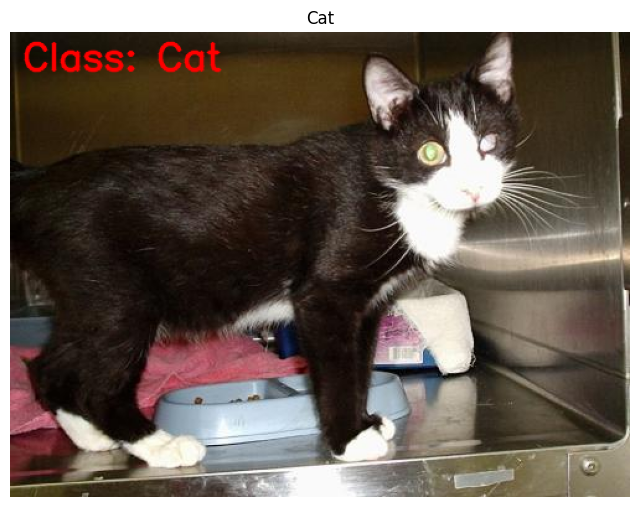

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


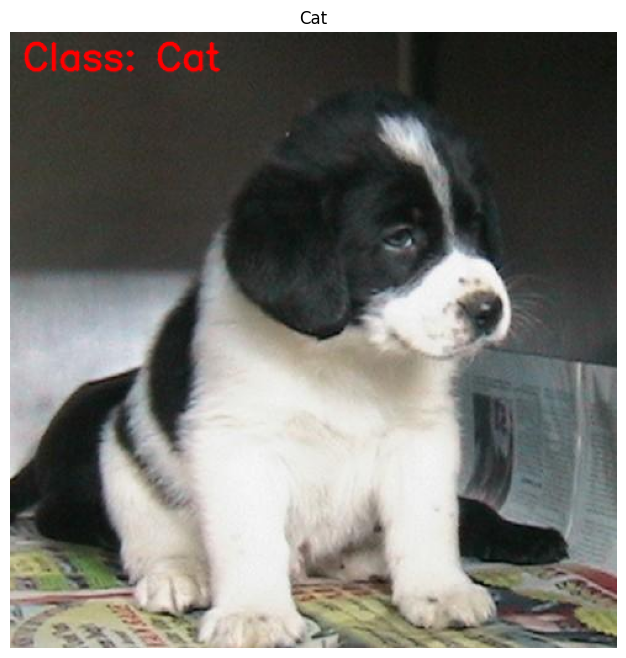

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


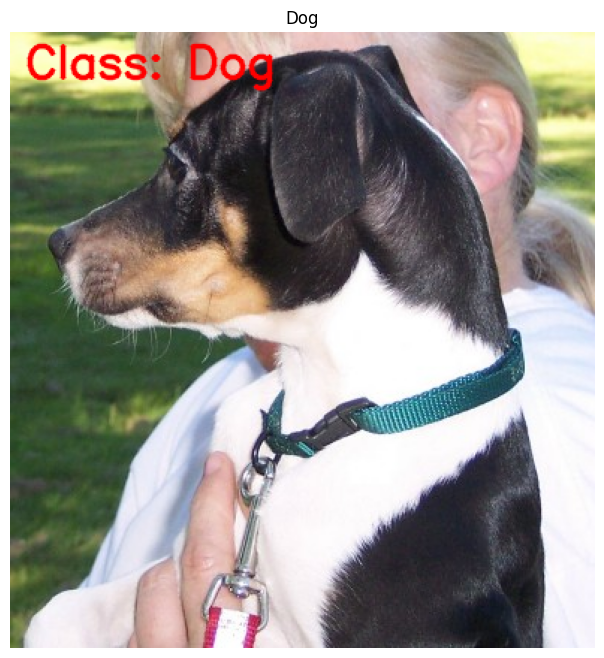

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


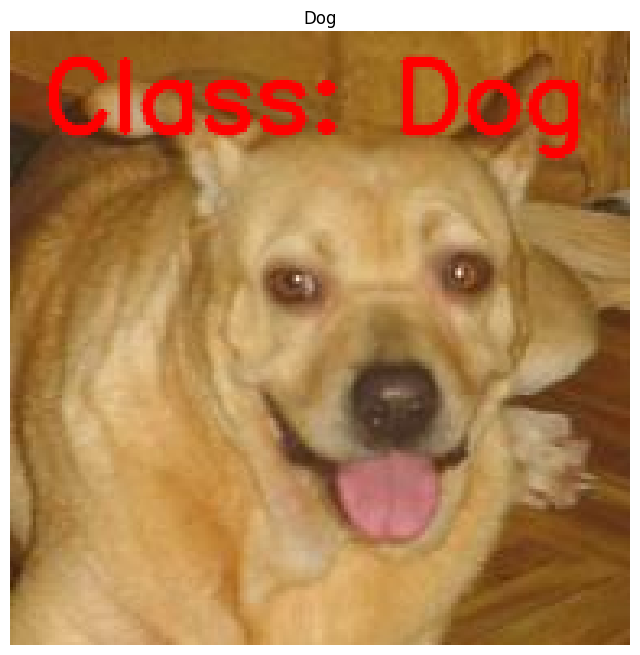

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


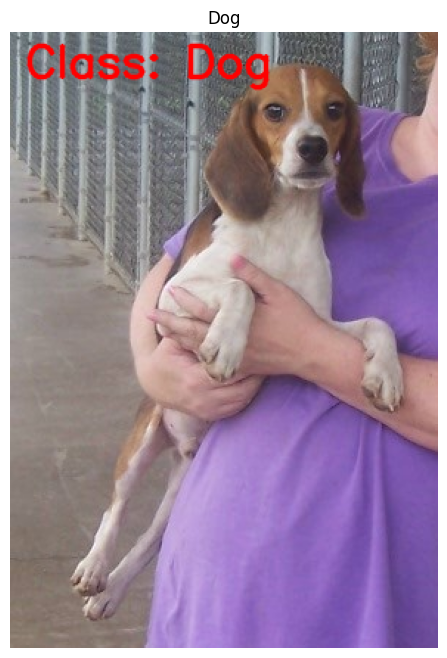

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


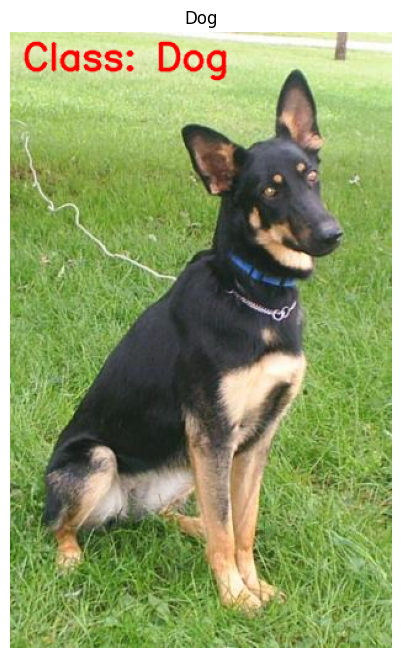

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


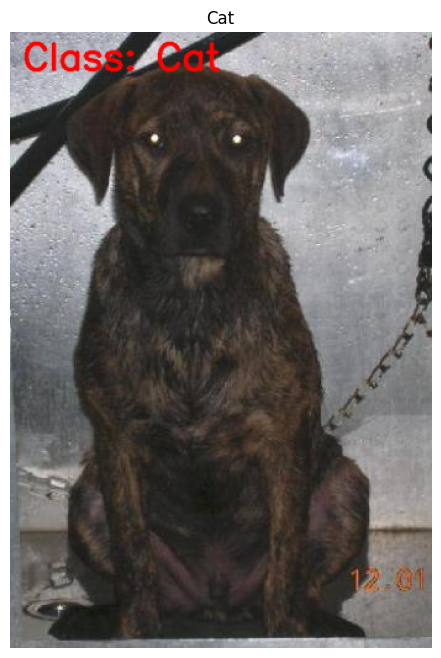

In [104]:

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(data_dir) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

# Testar com uma ou mais imagens
image_paths = [images[p] for p in idx]  # Substitua pelos caminhos das suas imagens


for image_path in image_paths:
    predict_and_annotate(image_path, model)
   
